In [1]:
# Import `create_game` package, wherever it is located for you. 
import sys
sys.path.insert(0, '..')
from create_game import register_json_folder, register_json_str

# Set the matplotlib settings for rendering the result video to the notebook.
# See the comment at the bottom for more information. 
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "html5"
import matplotlib.animation
import gym

In [2]:
# Register your folder of .json files defining the tasks
register_json_folder('./custom_json')

In [3]:
# Register a string as a JSON environment
json_str = """ {
    "name": "CustomPush2",
    "lvl_type": "marker",
    "target": "[-0.1, -0.25 + OFFSET]",
    "goal": "[0.7, -0.75 + OFFSET]",
    "rnd": {
        "marker_ball:0": "[uniform(-HIGH_NOISE, HIGH_NOISE), uniform(-HIGH_NOISE, HIGH_NOISE)]",
        "target,medium_floor:0": "[uniform(-HIGH_NOISE, HIGH_NOISE), uniform(-HIGH_NOISE, HIGH_NOISE)]",
        "goal,medium_floor:1": "[uniform(-HIGH_NOISE, HIGH_NOISE), uniform(-HIGH_NOISE, HIGH_NOISE)]"
    },  
    "env": [
        {   
            "name": "marker_ball",
            "pos": [0.6, 0.75],
            "id": 0
        },  
        {   
            "name": "medium_floor",
            "pos": "[0.1, -0.25]",
            "id": 0
        },  
        {   
            "name": "medium_floor",
            "pos": "[0.7, -0.75]",
            "id": 1
        }   
    ]   
}
"""
register_json_str(json_str)

/home/bili/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:20: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: float32. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
/home/bili/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/bili/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/bili/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by 

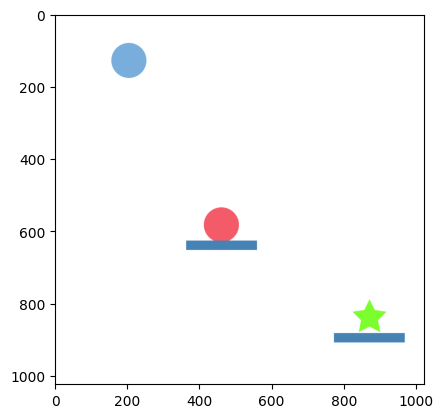

In [4]:
env1 = gym.make('CreateLevelCustomPush-v0')
env2 = gym.make('CreateLevelCustomPush2-v0')

# Try any environment here
env = env1

obs = env.reset()
done = False
frames = []
frames.append(env.render('rgb_array_high_mega_changed_colors'))

while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    frame = env.render('rgb_array_high_mega_changed_colors')
    frames.append(frame)

def update(i):
    ax.imshow(frames[i])

fig, ax = plt.subplots(1,1)

# Render the frames array to the screen. 
# If this doesn't work you can try another way from this StackOverflow thread: 
# https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook
ani = matplotlib.animation.FuncAnimation(fig, update, frames=len(frames))
ani